In [160]:
import os
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [161]:
cl = {"cloudy":0,"desert":1,"green_area":2,"water":3}
x = []

y = []

In [162]:
cloudy = 'data/cloudy/'

for img in os.listdir(cloudy):
    img_array = cv2.imread(os.path.join(cloudy,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    x.append(img_28x28)
    y.append(cl["cloudy"])

    
desert = 'data/desert/'

for img in os.listdir(desert):
    img_array = cv2.imread(os.path.join(desert,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    x.append(img_28x28)
    y.append(cl["desert"])


green_area = 'data/green_area/'

for img in os.listdir(green_area):
    img_array = cv2.imread(os.path.join(green_area,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    x.append(img_28x28)
    y.append(cl["green_area"])


water = 'data/water/'

for img in os.listdir(water):
    img_array = cv2.imread(os.path.join(water,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    x.append(img_28x28)
    y.append(cl["water"])

C:\Users\anike\AppData\Local\Temp\ipykernel_3396\73073089.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
C:\Users\anike\AppData\Local\Temp\ipykernel_3396\73073089.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
C:\Users\anike\AppData\Local\Temp\ipykernel_3396\73073089.py:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
C:\Users\anike\AppData\Local\Temp\ipykernel_3396\73073089.py:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_2

In [163]:
x

[array([[153, 149, 145, 155, 164, 170, 179, 182, 166, 153, 134, 126, 135,
         155, 173, 186, 190, 191, 177, 167, 171, 185, 184, 183, 182, 181,
         187, 195],
        [153, 149, 146, 157, 173, 193, 199, 195, 184, 181, 162, 161, 163,
         174, 187, 193, 191, 185, 177, 162, 164, 178, 190, 187, 181, 180,
         184, 190],
        [155, 152, 148, 166, 192, 206, 203, 203, 204, 197, 188, 198, 198,
         199, 202, 200, 189, 185, 182, 162, 164, 183, 194, 195, 189, 186,
         189, 191],
        [161, 159, 163, 185, 201, 207, 207, 207, 207, 197, 199, 209, 208,
         206, 208, 201, 185, 187, 174, 158, 175, 196, 197, 199, 201, 197,
         194, 194],
        [153, 162, 184, 205, 208, 212, 212, 211, 204, 201, 210, 211, 208,
         204, 208, 197, 177, 175, 171, 172, 181, 194, 199, 201, 204, 201,
         201, 202],
        [165, 189, 207, 211, 210, 212, 213, 213, 211, 211, 211, 211, 205,
         200, 201, 188, 168, 158, 170, 178, 186, 192, 193, 197, 202, 204,
         206

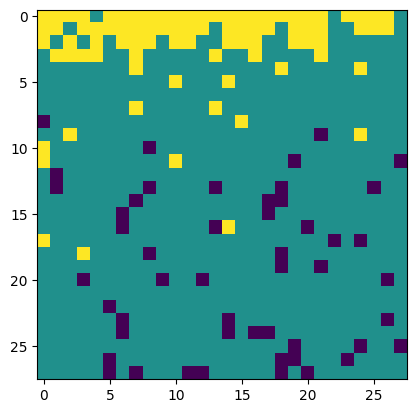

In [164]:
plt.imshow(x[5000])

In [165]:
y[5000]

3

In [166]:
x = np.array(x)
y = np.array(y)

In [167]:
x.shape

(5631, 28, 28)

In [168]:
y.shape

(5631,)

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [170]:
x_train = x_train/255
x_test = x_test/255

In [171]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [224]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # converting 28x28 2d array to 784 sized 1d array
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [228]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 256)               200960    
                                                                 
 dense_67 (Dense)            (None, 64)                16448     
                                                                 
 dense_68 (Dense)            (None, 16)                1040      
                                                                 
 dense_69 (Dense)            (None, 4)                 68        
                                                                 
Total params: 218,516
Trainable params: 218,516
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [230]:
history = model.fit(x_train,y_train,epochs=400,validation_split=0.2)

Epoch 1/400
113/113 [==============================] - 1s 5ms/step - loss: 1.2721 - accuracy: 0.3170 - val_loss: 1.1994 - val_accuracy: 0.4850
Epoch 2/400
113/113 [==============================] - 0s 4ms/step - loss: 1.1353 - accuracy: 0.4649 - val_loss: 1.0983 - val_accuracy: 0.4961
Epoch 3/400
113/113 [==============================] - 0s 4ms/step - loss: 1.0527 - accuracy: 0.5371 - val_loss: 1.0169 - val_accuracy: 0.4151
Epoch 4/400
113/113 [==============================] - 0s 4ms/step - loss: 0.9189 - accuracy: 0.4829 - val_loss: 0.8698 - val_accuracy: 0.5261
Epoch 5/400
113/113 [==============================] - 0s 4ms/step - loss: 0.8170 - accuracy: 0.5437 - val_loss: 0.7950 - val_accuracy: 0.5050
Epoch 6/400
113/113 [==============================] - 0s 4ms/step - loss: 0.8360 - accuracy: 0.5451 - val_loss: 0.7856 - val_accuracy: 0.5572
Epoch 7/400
113/113 [==============================] - 0s 4ms/step - loss: 0.7636 - accuracy: 0.5928 - val_loss: 0.7901 - val_accuracy: 0.5760

In [231]:
y_prob = model.predict(x_test)

36/36 [==============================] - 0s 2ms/step


In [232]:
y_prob

array([[1.2141004e-06, 1.8111374e-14, 2.3388742e-02, 9.7661006e-01],
       [6.4180952e-01, 3.5413158e-01, 2.1540026e-17, 4.0589711e-03],
       [6.5768898e-01, 3.3682865e-01, 7.0175833e-17, 5.4823593e-03],
       ...,
       [4.2691761e-01, 5.7308233e-01, 3.5471475e-35, 1.6534860e-07],
       [4.6157483e-03, 1.2424846e-06, 7.0495319e-01, 2.9042989e-01],
       [6.0692791e-02, 2.0796162e-04, 6.2385159e-05, 9.3903691e-01]],
      dtype=float32)

In [233]:
y_pred = y_prob.argmax(axis=1)

In [234]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7116237799467613

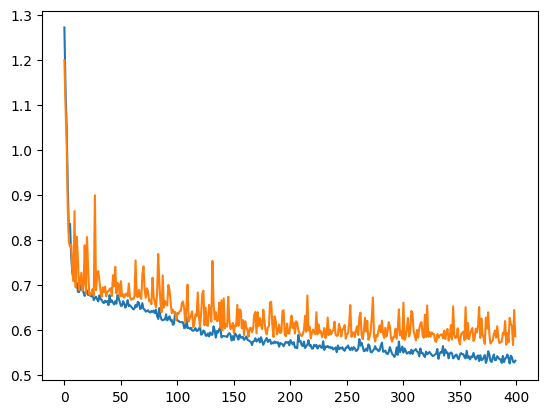

In [235]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

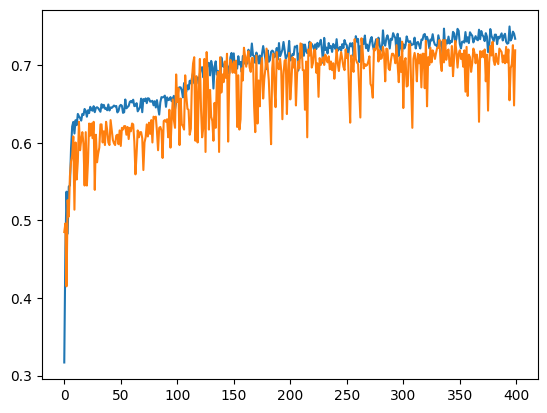

In [236]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [237]:
y_pred

array([3, 0, 0, ..., 1, 2, 3], dtype=int64)

In [251]:
x_test[23]

array([[0.49411765, 0.49411765, 0.49411765, 0.49803922, 0.49411765,
        0.49411765, 0.49411765, 0.49803922, 0.49411765, 0.49411765,
        0.49411765, 0.49019608, 0.49019608, 0.49019608, 0.49019608,
        0.48627451, 0.49019608, 0.48627451, 0.48627451, 0.49019608,
        0.49019608, 0.48627451, 0.48627451, 0.49019608, 0.49019608,
        0.49019608, 0.49019608, 0.49019608],
       [0.49411765, 0.49411765, 0.49411765, 0.49411765, 0.49411765,
        0.49411765, 0.49411765, 0.49411765, 0.49411765, 0.49411765,
        0.49411765, 0.49019608, 0.49019608, 0.49019608, 0.49019608,
        0.48627451, 0.48627451, 0.49019608, 0.48627451, 0.48627451,
        0.49019608, 0.49019608, 0.48627451, 0.49019608, 0.49019608,
        0.49019608, 0.49019608, 0.49019608],
       [0.49411765, 0.49411765, 0.49411765, 0.49411765, 0.49411765,
        0.49411765, 0.49411765, 0.49411765, 0.49411765, 0.49411765,
        0.49411765, 0.49411765, 0.49019608, 0.49019608, 0.48627451,
        0.49019608, 0.4901

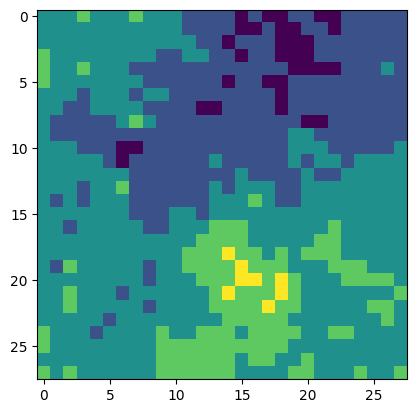

In [252]:
plt.imshow(x_test[23])

In [253]:
number = model.predict(x_test[23].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


In [254]:
print("The actual image is of",(list(cl.keys())[list(cl.values()).index(y_test[23])]))

The actual image is of cloudy


In [255]:
print("The predicted image is of",(list(cl.keys())[list(cl.values()).index(int(number))]))

The predicted image is of cloudy
